In [124]:
import pandas as pd
import numpy as np

import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [125]:
# obtained by tesseract lib

data = pd.read_csv('final_data.csv')
data = pd.DataFrame(data["Text"])

In [126]:
data.shape

(3650, 1)

In [127]:
data.head()

,Text
0,0 INDIA NON JUDICIAL § Government of K...
1,0 INDIA NON JUDICIAL § Government of K...
2,0 INDIA NON JUDICIAL § Government of K...
3,0 INDIA NON JUDICIAL § Government of K...
4,0 INDIA NON JUDICIAL § Government of K...


In [128]:
data.tail()

,Text
3645,"9 THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFO..."
3646,"9 THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFO..."
3647,"9 THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFO..."
3648,"9 THE AINL StORE1234 SOMEWHERE ROPOWAY, CALIFO..."
3649,"9 THE AINL StORE1234 SOMEWHERE ROPOWAY, CALIFO..."


In [129]:
data.isnull().sum()

Text    0
dtype: int64

In [130]:
def get_label(text):
    k=''
    for i in text:
        if i==' ':
            if len(k)>2:
                return 8
            return int(k)
        k+=i

In [131]:
data['label'] = data['Text'].apply(lambda x: get_label(x))
data["Text"] = data['Text'].str[1:]

In [132]:
data.head()

,Text,label
0,INDIA NON JUDICIAL § Government of Ka...,0
1,INDIA NON JUDICIAL § Government of Ka...,0
2,INDIA NON JUDICIAL § Government of Ka...,0
3,INDIA NON JUDICIAL § Government of Ka...,0
4,INDIA NON JUDICIAL § Government of Ka...,0


In [133]:
#data.to_csv(r'D:\coding\doc2\doc_classification\xyz.csv', index = False, header=True)

<AxesSubplot:>

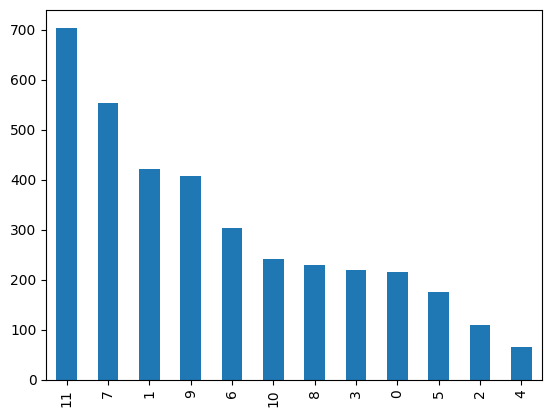

In [134]:
data.label.value_counts().plot(kind='bar')

In [135]:
data.head()

,Text,label
0,INDIA NON JUDICIAL § Government of Ka...,0
1,INDIA NON JUDICIAL § Government of Ka...,0
2,INDIA NON JUDICIAL § Government of Ka...,0
3,INDIA NON JUDICIAL § Government of Ka...,0
4,INDIA NON JUDICIAL § Government of Ka...,0


In [136]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)


data.shape

(3650, 2)

In [137]:
data.head()

,Text,label
0,INDIA NON JUDICIAL § Government of Ka...,address_proof
1,INDIA NON JUDICIAL § Government of Ka...,address_proof
2,INDIA NON JUDICIAL § Government of Ka...,address_proof
3,INDIA NON JUDICIAL § Government of Ka...,address_proof
4,INDIA NON JUDICIAL § Government of Ka...,address_proof


In [138]:
data.tail()

,Text,label
3645,"THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFOR...",receipts
3646,"THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFOR...",receipts
3647,"THE AINL StORE1234 SOMEWHERE RDPOWAY, CALIFOR...",receipts
3648,"THE AINL StORE1234 SOMEWHERE ROPOWAY, CALIFOR...",receipts
3649,"THE AINL StORE1234 SOMEWHERE ROPOWAY, CALIFOR...",receipts


In [139]:
mapping = {0:'address_proof', 1:"bank_statements",2:"business_proof",3:"employment_proof",4:'fund_raising',5:'identity_proof',6:'invoices',7:'personal_finance_statement',8:'power_of_attorney',9:'receipts',10:'salary_slip',11:'tax_return'}
data['label'].replace(mapping,inplace = True)

<AxesSubplot:>

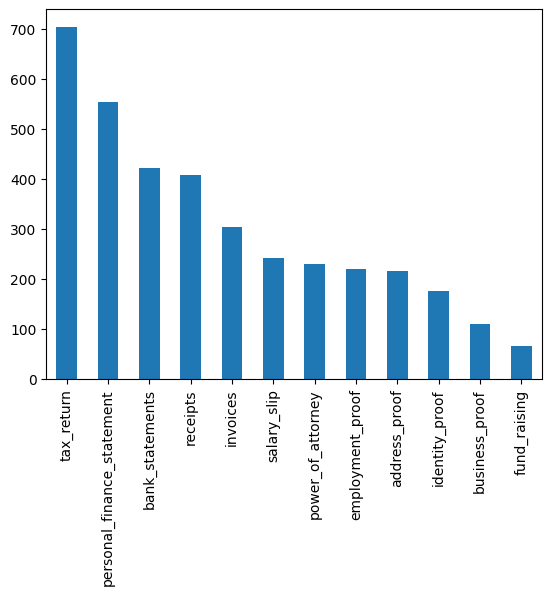

In [140]:
data.label.value_counts().plot(kind='bar')

In [141]:
data.label.value_counts()

tax_return                    704
personal_finance_statement    554
bank_statements               422
receipts                      407
invoices                      304
salary_slip                   242
power_of_attorney             230
employment_proof              220
address_proof                 215
identity_proof                176
business_proof                110
fund_raising                   66
Name: label, dtype: int64

In [142]:
data['Text'] = data['Text'].replace(r'[^A-Za-z0-9 ]+', '')
data['Text'] = data['Text'].apply (lambda x: re.sub(r"((?<=^)|(?<= )).((?=$)|(?= ))", '', x).strip())

# replacing the punctuations and the other sindle lettered words
# 

In [143]:
vectorizer = CountVectorizer(stop_words='english') 

# for counting the frequencies of words

In [144]:
x = data['Text']
y = data['label']

In [145]:
x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 88)


#

In [160]:
x_vec = vectorizer.fit_transform(x_train)
x_vec

<2920x12081 sparse matrix of type '<class 'numpy.int64'>'
	with 258993 stored elements in Compressed Sparse Row format>

In [161]:
model = MultinomialNB()

In [162]:
model.fit(x_vec,y_train)

MultinomialNB()

In [164]:
y_pred = model.predict(vectorizer.transform(x_test))
y_pred

array(['receipts', 'tax_return', 'tax_return', 'invoices',
       'personal_finance_statement', 'tax_return', 'bank_statements',
       'bank_statements', 'receipts', 'receipts', 'identity_proof',
       'invoices', 'receipts', 'employment_proof', 'tax_return',
       'power_of_attorney', 'invoices', 'salary_slip', 'tax_return',
       'employment_proof', 'invoices', 'tax_return', 'tax_return',
       'personal_finance_statement', 'bank_statements', 'tax_return',
       'bank_statements', 'salary_slip', 'invoices',
       'personal_finance_statement', 'identity_proof',
       'power_of_attorney', 'receipts', 'tax_return', 'bank_statements',
       'tax_return', 'receipts', 'personal_finance_statement',
       'personal_finance_statement', 'personal_finance_statement',
       'identity_proof', 'power_of_attorney',
       'personal_finance_statement', 'address_proof',
       'personal_finance_statement', 'tax_return', 'tax_return',
       'power_of_attorney', 'identity_proof',
       'pe

In [165]:
print(accuracy_score(y_test,y_pred))

0.9602739726027397


In [151]:
#classification_report(y,y_pred)

In [152]:
te = pd.read_csv('test.csv')
te

,Text
0,STATE OF SOUTH CAROLINA _ ) AFFIDAVIT OF RESI...


In [153]:
te.isnull().sum()

Text    0
dtype: int64

In [154]:
test = te['Text']
test

0    STATE OF SOUTH CAROLINA _ ) AFFIDAVIT OF  RESI...
Name: Text, dtype: object

In [155]:
test_vec = vectorizer.transform(test)
test_vec

<1x12271 sparse matrix of type '<class 'numpy.int64'>'
	with 61 stored elements in Compressed Sparse Row format>

In [156]:
model.predict(vectorizer.transform(test))

array(['address_proof'], dtype='<U26')

In [157]:
# exporting the model

In [158]:
import pickle

In [159]:
pickle.dump(model,open('naive_model.pkl','wb'))